# Imports

In [ ]:

import networkx as nx
import matplotlib.pyplot as plt

#topology_dir = "C:/Users/bbenc/Documents/NETWORKZ/cloud_work/src/"
topology_dir = "C:/Users/bbenc/OneDrive/Documents/aGraph/cloud_work/src/"
G = nx.read_gml(topology_dir+"26_usa.gml")



In [ ]:
graph = G;
# Get the number of nodes and edges in the network
num_nodes = len(graph.nodes())
num_edges = len(graph.edges())

# Calculate the average degree of the network
avg_degree = sum(dict(graph.degree()).values()) / num_nodes

print(f"Number of nodes: {num_nodes}")
print(f"Number of edges: {num_edges}")
print(f"Average degree: {avg_degree}")

graph.edges()


In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

#topology_dir = "C:/Users/bbenc/Documents/NETWORKZ/cloud_work/src/"

# Load the graph from the GML file
graph = nx.read_gml(topology_dir + "26_usa_scaled.gml")

# Retrieve node positions from the 'Longitude' and 'Latitude' attributes
pos = {node_id: (data['Longitude'], data['Latitude']) for node_id, data in graph.nodes(data=True)}

# Create a basic network visualization
nx.draw(graph, pos, with_labels=True, node_size=50, node_color='skyblue', font_size=6)

# Display the visualization
plt.show()


In [ ]:
## UTILS AND METHODS
import networkx as nx
import matplotlib.pyplot as plt
import random

def generate_players(num_players=10, x_range=(0, 100), y_range=(0, 100)):
    players = {}
    x_start, x_stop = x_range
    y_start, y_stop = y_range
    for i in range(num_players):
        player_name = f"P{i+1}"
        x = random.uniform(x_start, x_stop)
        y = random.uniform(y_start, y_stop)
        players[player_name] = (y, x)
    return players



def generate_servers():
    # Prediktív szerverek pozíciói
    servers = {
        "S1": (0, 0),
        "S2": (50, 50),
        "S3": (100, 100)
    }
    return servers


def connect_player_to_server(players, player, servers, G):
    player_position = players[player]
    
    # Legközelebbi szerver kiválasztása
    closest_server = min(servers, key=lambda server: abs(player_position[0] - servers[server][0]) + abs(player_position[1] - servers[server][1]))
    
    # Él hozzáadása a játékos és a legközelebbi szerver között
    distance = abs(player_position[0] - servers[closest_server][0]) + abs(player_position[1] - servers[closest_server][1])
    G.add_edge(player, closest_server, length=distance)
    
    return G


def draw_graph(G, pos, servers, players, canvas_size, node_size=200, show_edge_labels=False):
    plt.figure(figsize=canvas_size)
    print(G.edges())
    # Szerverek kirajzolása
    nx.draw_networkx_nodes(G, pos, nodelist=servers.keys(), node_color='b', node_size=2.5*node_size, label="Servers")
    # Játékosok kirajzolása
    nx.draw_networkx_nodes(G, pos, nodelist=players.keys(), node_color='g', node_size=node_size, label="Players")

    # Élek kirajzolása
    nx.draw_networkx_edges(G, pos, edgelist=G.edges(), width=1.0, alpha=0.5)


    # Él súlyok (távolságok) hozzáadása
    if show_edge_labels:
        edge_labels = {(player, server): G[player][server]["length"] for player, server in G.edges}
        nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)

    # Címkék hozzáadása a csomópontokhoz
    node_labels = {node: node for node in G.nodes}
    nx.draw_networkx_labels(G, pos, labels=node_labels)

    # Kirajzolás beállításai
    plt.title("Szerverek és Játékosok")
    plt.show()


In [ ]:
# Játékosok pozícióinak generálása
num_players = 100
random_range = 100
players = generate_players(num_players, random_range)

servers = generate_servers()

# Gráf létrehozása és pozíciók hozzáadása
G = nx.Graph()
G.add_nodes_from(servers.keys())
G.add_nodes_from(players.keys())

# Játékosok összekapcsolása a legközelebbi szerverekkel
for player in players:
    G = connect_player_to_server(player, servers, G)

# Pozíció információk előkészítése és gráf kirajzolása
pos = {**servers, **players}
draw_graph(G, pos, canvas_size=(24, 20), node_size=300, show_edge_labels=False)

[('0', '7'), ('0', '13'), ('0', '14'), ('0', '18'), ('1', '25'), ('1', '30'), ('1', '35'), ('1', 'P1'), ('1', 'P2'), ('1', 'P3'), ('1', 'P4'), ('1', 'P5'), ('1', 'P6'), ('1', 'P7'), ('1', 'P8'), ('1', 'P9'), ('1', 'P10'), ('1', 'P11'), ('1', 'P12'), ('1', 'P13'), ('1', 'P14'), ('1', 'P15'), ('1', 'P16'), ('1', 'P17'), ('1', 'P18'), ('1', 'P19'), ('1', 'P20'), ('1', 'P21'), ('1', 'P22'), ('1', 'P23'), ('1', 'P24'), ('1', 'P25'), ('1', 'P26'), ('1', 'P27'), ('1', 'P28'), ('1', 'P29'), ('1', 'P30'), ('1', 'P31'), ('1', 'P32'), ('1', 'P33'), ('1', 'P34'), ('1', 'P35'), ('1', 'P36'), ('1', 'P37'), ('1', 'P38'), ('1', 'P39'), ('1', 'P40'), ('1', 'P41'), ('1', 'P42'), ('1', 'P43'), ('1', 'P44'), ('1', 'P45'), ('1', 'P46'), ('1', 'P47'), ('1', 'P48'), ('1', 'P49'), ('1', 'P50'), ('1', 'P51'), ('1', 'P52'), ('1', 'P53'), ('1', 'P54'), ('1', 'P55'), ('1', 'P56'), ('1', 'P57'), ('1', 'P58'), ('1', 'P59'), ('1', 'P60'), ('1', 'P61'), ('1', 'P62'), ('1', 'P63'), ('1', 'P64'), ('1', 'P65'), ('1', 'P

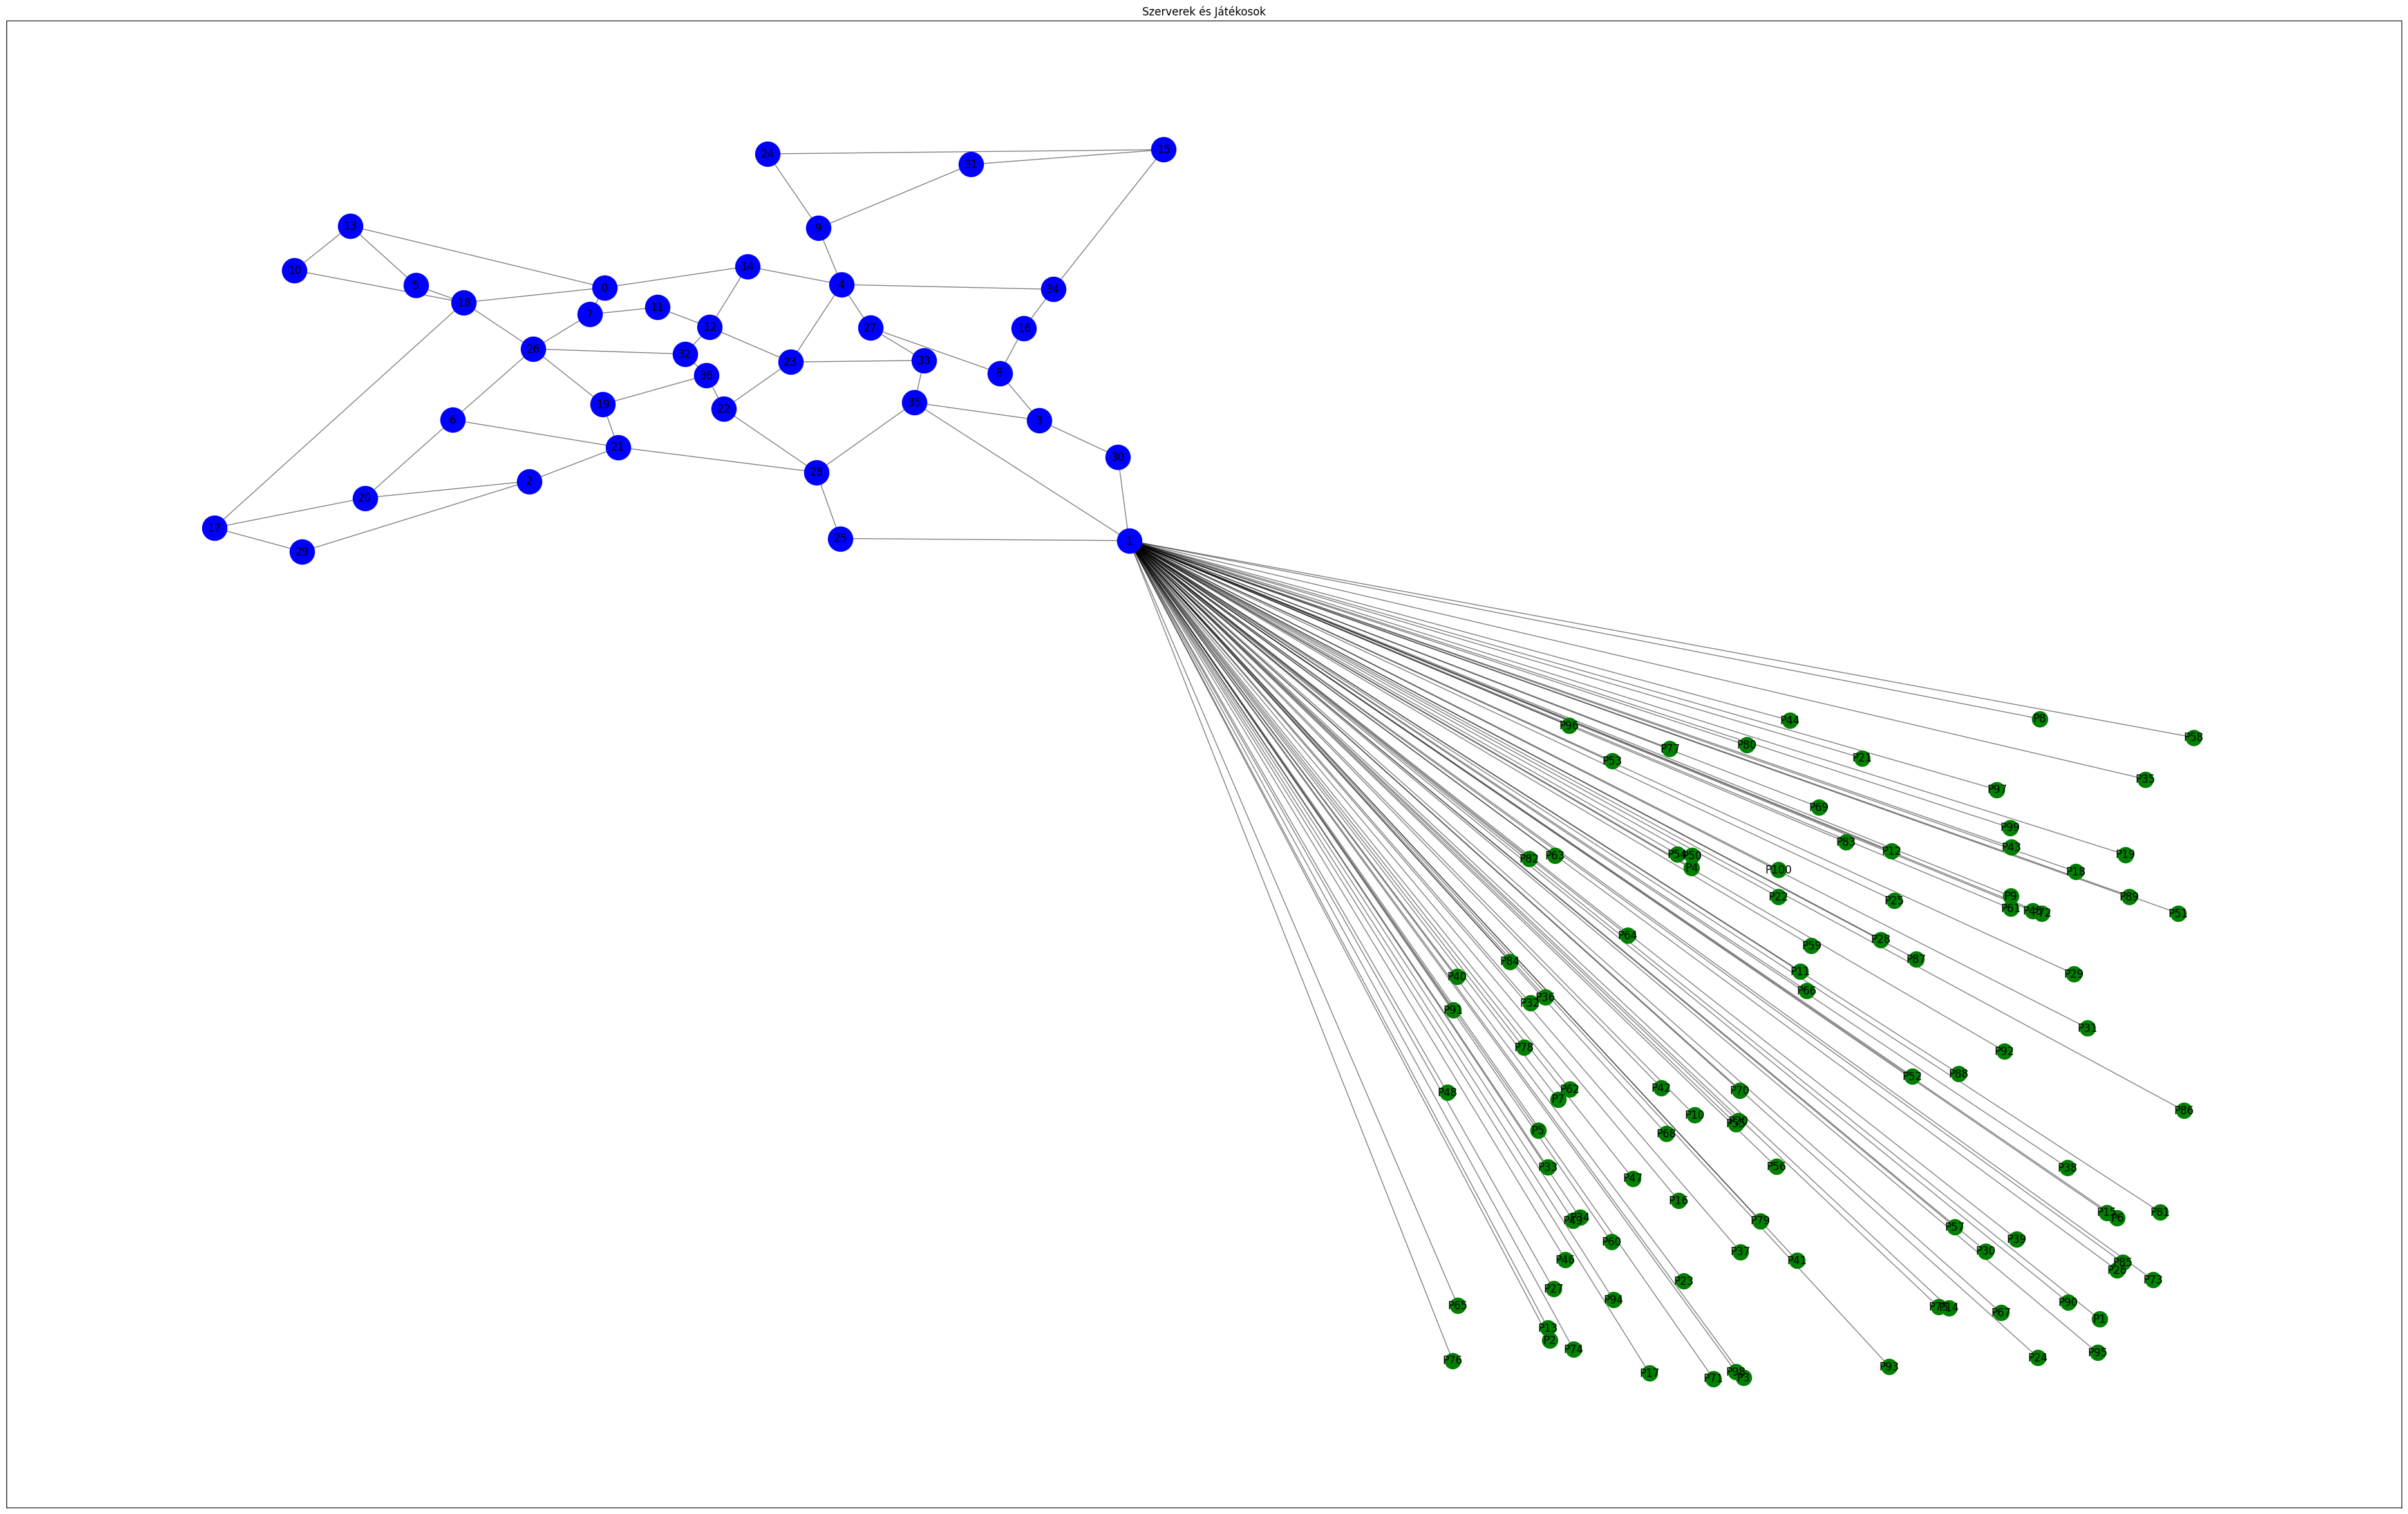

In [13]:
# Adding server nodes
G = nx.read_gml(topology_dir+"37_cost.gml")

# Szerverek pozícióinak kinyerése
server_positions = {}
for node in G.nodes(data=True):
    node_id = node[0]
    node_data = node[1]
    if 'Latitude' in node_data and 'Longitude' in node_data:
        latitude = node_data['Latitude']
        longitude = node_data['Longitude']
        server_positions[node_id] = (longitude, latitude)  # A pozíció sorrendje longitude, latitude


# Adding player
num_players = 100
#lat_range = (25,45)
#long_range = (-123, -70)
lat_range = (35, 62) # from graph
long_range = (-10,28) # from graph
players = generate_players(num_players, long_range, lat_range)
G.add_nodes_from(players.keys())

# Pozíció információk előkészítése
pos = {**server_positions, **players}

# Játékosok összekapcsolása a legközelebbi szerverekkel
for player in players:
    G = connect_player_to_server(players, player, server_positions, G)

# Gráf kirajzolása 
draw_graph(G, pos, server_positions, players, canvas_size=(48, 30), node_size=300, show_edge_labels=False)






In [ ]:
server_positions = {}
for node in G.nodes(data=True):
    node_id = node[0]
    node_data = node[1]
    if 'Latitude' in node_data and 'Longitude' in node_data:
        latitude = node_data['Latitude']
        longitude = node_data['Longitude']
        server_positions[node_id] = (longitude, latitude)  # A pozíció sorrendje longitude, latitude
    

In [ ]:
for pos in server_positions.values():
    print(pos)

In [ ]:
for pos in players.values():
    print(pos)

In [ ]:
import networkx as nx
# Create a graph
G = nx.wheel_graph(7)

print("Vertices:",G.nodes)
print("Edges:",G.edges)

In [ ]:
# Adding server nodes
G = nx.read_gml(topology_dir+"26_usa.gml")

# Szerverek pozícióinak kinyerése
server_positions = {}
for node in G.nodes(data=True):
    node_id = node[0]
    node_data = node[1]
    if 'Latitude' in node_data and 'Longitude' in node_data:
        latitude = node_data['Latitude']
        longitude = node_data['Longitude']
        server_positions[node_id] = (longitude, latitude)  # A pozíció sorrendje longitude, latitude


# Adding player
num_players = 100
lat_range = (25,45)
long_range = (-123, -70)
players = generate_players(num_players, long_range, lat_range)
G.add_nodes_from(players.keys())

def get_delay(graph, node1, node2):
    try:
        delay = nx.shortest_path_length(graph, node1, node2, weight='length')
        return delay
    except nx.NetworkXNoPath:
        # Ha nincs útvonal a két pont között
        return float('inf')
    
for server_idx, server_pos in server_positions.items():
    print(f"{server_idx} - {server_pos}")


In [ ]:
for nodeid, position in server_positions.items():
    print(f"{nodeid} : {position}")

In [ ]:
import gurobipy as gp
from gurobipy import GRB

# Create a new model
model = gp.Model("LinearProgrammingExample")

# Create variables
x = model.addVar(lb=0, vtype=GRB.CONTINUOUS, name="x")
y = model.addVar(lb=0, vtype=GRB.CONTINUOUS, name="y")

# Set objective function: maximize 2x + 3y
model.setObjective(2*x + 3*y, sense=GRB.MAXIMIZE)

# Add constraints
model.addConstr(x + 2 * y <= 6, "constraint1")
model.addConstr(3 * x - y >= 3, "constraint2")

# Optimize the model
model.optimize()

# Print the results
if model.status == GRB.OPTIMAL:
    print("Optimal solution found!")
    print(f"x = {x.x}, y = {y.x}")
    print(f"Optimal objective value: {model.objVal}")
else:
    print("No solution found.")
